In [1]:
from typing import Dict

import ml_collections
import torch
import torchvision
from collections import Counter

from datasets import MNIST_rot

In [4]:
data_mean = (0.1307,)
data_stddev = (0.3081,)
transform_train = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(data_mean, data_stddev),
    ]
)
transform_test = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(data_mean, data_stddev),
    ]
)

In [5]:
training_set = MNIST_rot(root="./data", train=True, download=True, transform=transform_train, data_fraction=1)
test_set = MNIST_rot(root="./data", train=False, download=True, transform=transform_test, data_fraction=1)

training_loader = torch.utils.data.DataLoader(
    training_set,
    batch_size=4,
    shuffle=True,
    num_workers=4,
)
test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=4,
    shuffle=False,
    num_workers=4,
)

Length of the train dataset is 10000
Length of the test dataset is 50000


In [8]:
len(training_loader), len(training_set)  # batch is 4

(2500, 10000)

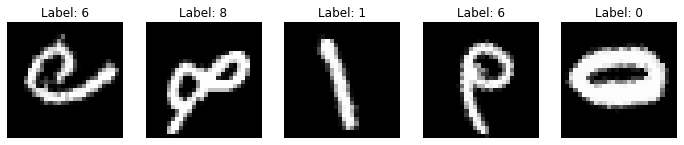

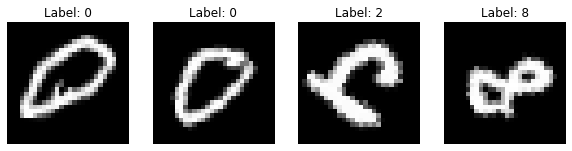

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize some samples from the training set
num_samples_to_visualize = 5
fig, axes = plt.subplots(1, num_samples_to_visualize, figsize=(12, 3))
for i in range(num_samples_to_visualize):
    image, label = training_set[i]
    axes[i].imshow(np.squeeze(image), cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')
plt.show()

# Visualize a batch of images loaded using the training loader
dataiter = iter(training_loader)
images, labels = dataiter.next()

# Plot the images in the batch
plt.figure(figsize=(10, 4))
for idx in range(images.size(0)):
    plt.subplot(1, 4, idx + 1)
    plt.imshow(images[idx].squeeze(), cmap='gray')
    plt.title(f"Label: {labels[idx].item()}")
    plt.axis('off')
plt.show()
